# Summary

## Question 1: 
Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The average order amount does not consider that the order amount can include multiple shoes being bought at once. There can also be possible errors in the data in addition the inclusion of outliers can skew the average value.

A better way of evaluating the data would be to first clean the data of outliers and then use the average unit order amount instead of the regular order amount. This eliminates the distortion caused by shops ordering different amounts of shoes.

b.	What metric would you report for this dataset?

The median value of the unit order amount price.

c.	What is its value?

$153.00

## Question 2: 
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?

<strong>54</strong> orders.

b.	What is the last name of the employee with the most orders?

<strong>Peacock</strong> with <strong>40</strong> orders. 

c.	What product was ordered the most by customers in Germany?

<strong>Boston Crab Meat</strong> with <strong>160</strong> units being sold.

Please see the code below for explicit details and methodology.


# Q1.
First the pandas library is imported to allow for the data to be viewed and manipulated with dataframes.
After reading in the data, .info() is used to check for missing data as well as to check the size of our data set.
Then .head() is used to get an idea of what data is in the set.

In [1]:
import pandas as pd

data_source = 'Winter Data Science Intern Challenge Data Set.xlsx'

data = pd.read_excel(data_source)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


Observing the results from .info() there is no null values and thus no missing values.
Now we will focus on the order amount.

In [2]:
pd.set_option('precision', 2)
order_data = data['order_amount']
order_data.describe()

count      5000.00
mean       3145.13
std       41282.54
min          90.00
25%         163.00
50%         284.00
75%         390.00
max      704000.00
Name: order_amount, dtype: float64

Observing the results from calling .describe() we can observe that the mean is $3145.13 , which is the AOV found in the question. The standard deviation is very large suggesting that the data is very spread out. This is especially evident when comparing the minimum, maximum and quartile values.

Now we will create a box plot to better understand the data.

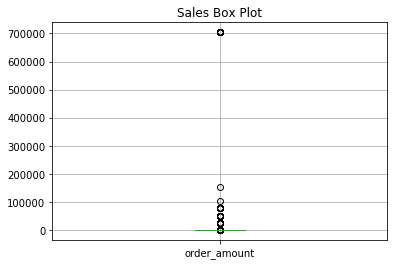

In [3]:
import matplotlib.pyplot as plt

order_data.plot.box(title='Sales Box Plot' , grid=True)
plt.show()

The main plot appears as a very small line near the zero line. There are many outliers which are much larger than the quartile values, hence they should now be investigated.

In [4]:
outliers = data.groupby(['order_amount']).size().reset_index(name='count').sort_values(by = 'order_amount' , ascending = False)
outliers.head(15)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


After reviewing the top 15 largest values 704000, 25725, 51450 appear multiple times and thus would skew the data. Also single values likes 154350 and 102900 are much larger than what one would expect for a pair of shoes and thus are suspicious. First we shall investigate large values that appear multiple times.

In [5]:
data.loc[data['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00.000
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00.000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000


The value 704000 occurs with 2000 total items. This value also occurs at the same time everyday by the same store and the same user. Hence this could be a duplication error in the data collection system or it could possibly be one store buying shoes in bulk using an automated process. 704000 for 2000 shoes results in a unit shoe price of $352.00 which is much more reasonable than the AOV found initially in the question. Hence it is also possible that his store may have arranged some pricing deal if they bought in bulk.

Using this discovery a more reasonable element to work with may be the unit price for an order.

In [6]:
data['order_amt_unit'] = data.apply(lambda row: row.order_amount / row.total_items, axis = 1)
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amt_unit
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


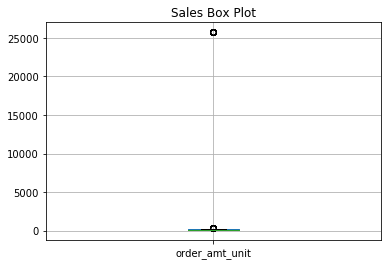

In [7]:
data['order_amt_unit'].plot.box(title='Sales Box Plot' , grid=True)
plt.show()

Using the order unit price has eliminated a lot of the initial outliers but some are still left. The remaining outliers are still too large to be reasonlably be considered as the actual price of a shoe and thus will be removed.

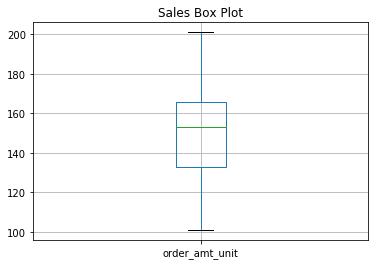

In [8]:
firstq = data['order_amt_unit'].quantile(q=0.25)
secondq = data['order_amt_unit'].quantile(q=0.50)
thirdq =  data['order_amt_unit'].quantile(q=0.75)
IQR = thirdq - firstq
IQR2 = IQR * 1.5

data_cleaned = data[(data.order_amt_unit < secondq + IQR2) & (data.order_amt_unit > secondq - IQR2)]
bplot = data_cleaned['order_amt_unit'].plot.box(title='Sales Box Plot' , grid=True)

plt.show()



In [9]:
data_cleaned['order_amt_unit'].describe()

count    4806.00
mean      151.57
std        22.60
min       101.00
25%       133.00
50%       153.00
75%       166.00
max       201.00
Name: order_amt_unit, dtype: float64

Using the cleaned data we can see that the standard deviation is now much smaller, now being 22.60. Hence a more reasonable metric for AOV can be the median of the unit price for an order amount which is 153.00 which is not much different from the mean of 151.57.

<hr>

# Q2.
Data Source: https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL

a. How many orders were shipped by Speedy Express in total?

After inspecting the tables, the required data can be found using two tables. The Shippers table contains the ShipperID and ShipperName columns while the Orders table contains the ShipperID and OrderIDs.

Hence to calculate the number of orders the Shippers and Orders tables need to be join. The results are then filtered by the ShipperName Speedy Express and finally the rows are counted to get the number of orders.

Hence using the query below, <strong>54</strong> orders were shipped by Speedy Express.


<pre>
    Query:

    SELECT COUNT(OrderID) AS Number_of_orders
    FROM Shippers
    INNER JOIN Orders ON Shippers.ShipperID = Orders.ShipperID
    WHERE ShipperName = 'Speedy Express' ;

    Result: <strong>54</strong>

<hr>

b. What is the last name of the employee with the most orders?

After inspecting the tables, the required data can be found using two tables. The Orders table contains the OrderID and EmployeeID columns while the Employees table contains the LastName and EmployeeID columns.

Hence to find the employee with the most orders, the Orders and Employees tables need to be joined. The EmployeeID from the orders table is counted to calculate the number of orders each employee had. Finally the table is organized in descending order and limited to one so that only the employee with the most orders is returned.

Hence using the query below it was found that <strong>Peacock</strong> is the employee with the most orders having <strong>40</strong>.

<pre>
    Query:

    SELECT Employees.LastName , COUNT(Orders.EmployeeID) AS Number_of_orders
    FROM Orders
    INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
    GROUP BY Orders.EmployeeID
    ORDER BY number_of_orders
    DESC LIMIT 1;

    Result: <strong>Peacock  40</strong>
<hr>

c.	What product was ordered the most by customers in Germany?

Upon inspection of the tables, it can be noticed that the relevant data is spread across many tables. The Orders, OrderDetails, Products and Customers tables all need to be joined. The table is filtered by the country German to acquire the details for the products bought by customers in Germany. Finally the quantity of each product sold is summed from the OrderDetails table to calculate the total amount sold.

Hence from the query below it can be determined that <strong>Boston Crab Meat</strong> is the most popular product among customers in Germany having sold <strong>160</strong> units.

<pre>
    Query:

    SELECT Products.ProductName , SUM(OrderDetails.Quantity) as Sales_number
    FROM Customers
    INNER JOIN Orders ON Orders.CustomerID = Customers.CustomerID
    INNER JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID
    INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID
    WHERE Country = 'Germany'
    GROUP BY ProductName
    ORDER BY Sales_number
    DESC LIMIT 1;

    Result:  <strong>Boston Crab Meat 160</strong> 


<hr>